# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
#!pip install citipy
from citipy import citipy

#Set dependencies
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress

#import api key
from api_keys import weather_api_key

#Range of latitudes and longitudes
range_lat = (-90,90)
range_lng = (-180,180)

## Generate Cities List

In [7]:
#empty lists to hold data
lat_lng_list = []
city_list = []

#generate random latitudes and longitudes
lats = np.random.uniform(range_lat[0],range_lat[1],size=1500)
lngs = np.random.uniform(range_lng[0],range_lng[1],size=1500)

#zip latitudes and longitudes together
lat_lng_list = zip(lats,lngs)

#identify city based on lat/lng
for lat_lng in lat_lng_list:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    if city not in city_list:
        city_list.append(city)

#find number of cities
len(city_list)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#put list of cities into a data frame
city_df = pd.DataFrame(city_list)
city_df = city_df.rename(columns = {0:'City'})

#add additional columns
city_df['Lat']=""
city_df['Lng']=""
city_df['Max Temp']=""
city_df['Humidity']=""
city_df['Cloudiness']=""
city_df['Wind Speed']=""
city_df['Country']=""
city_df['Date']=""

#define variables
url = "http://api.openweathermap.org/data/2.5/weather?"
record_count = 0
set_count = 1

print("Beginning Data Retrieval")
print("--------------------------")

#iterate through the city df
for index,row in city_df.iterrows():
    #access api
    city_name = row["City"]
    city_url = f'{url}appid={weather_api_key}&q={city_name.replace(" ", "")}&units=imperial'
    response = requests.get(city_url).json()
    if record_count < 50:
        record_count = record_count +1
    else:
        set_count = set_count + 1
        record_count = 1
    print(f'Processing Record {record_count} of Set {set_count}| {city_name}')
    #add information to city df
    try:
        city_df.loc[index, "Lat"]=response['coord']['lat']
        city_df.loc[index, "Lng"]=response['coord']['lon']
        city_df.loc[index, "Max Temp"]=response['main']['temp_max']
        city_df.loc[index, "Humidity"]=response['main']['humidity']
        city_df.loc[index, "Cloudiness"]=response['clouds']['all']
        city_df.loc[index, "Wind Speed"]=response['wind']['speed']
        city_df.loc[index, "Country"]=response['sys']['country']
        city_df.loc[index, "Date"]=response['dt']
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    #keep the api from pulling too many requests in a minute
    time.sleep(1.5)
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1| adrar
Processing Record 2 of Set 1| chokurdakh
Processing Record 3 of Set 1| laguna
Processing Record 4 of Set 1| mehamn
Processing Record 5 of Set 1| samusu
City not found. Skipping...
Processing Record 6 of Set 1| punta arenas
City not found. Skipping...
Processing Record 7 of Set 1| lleida
Processing Record 8 of Set 1| cape town
City not found. Skipping...
Processing Record 9 of Set 1| ribeira grande
City not found. Skipping...
Processing Record 10 of Set 1| rikitea
Processing Record 11 of Set 1| hobyo
Processing Record 12 of Set 1| bayan
Processing Record 13 of Set 1| mar del plata
City not found. Skipping...
Processing Record 14 of Set 1| bodmin
Processing Record 15 of Set 1| busselton
Processing Record 16 of Set 1| butaritari
Processing Record 17 of Set 1| bengkulu
Processing Record 18 of Set 1| jalingo
Processing Record 19 of Set 1| ushuaia
Processing Record 20 of Set 1| bagdarin
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#clean the data frame
clean_df = city_df
clean_df = clean_df.replace('', np.nan)
clean_df = clean_df.dropna()

#export city data into a .csv
clean_df.to_csv('WeatherPY/output_data/clean_cities_data_2.csv', index = False, header=True)

#Display the df
clean_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adrar,20.5022,-10.0711,80.08,7.0,0.0,10.74,MR,1.616788e+09
1,chokurdakh,70.6333,147.9167,-31.85,100.0,76.0,4.47,RU,1.616788e+09
2,laguna,38.4210,-121.4238,69.01,24.0,1.0,16.11,US,1.616788e+09
3,mehamn,71.0357,27.8492,37.40,64.0,0.0,35.68,NO,1.616788e+09
6,lleida,41.6167,0.6167,62.01,67.0,0.0,3.44,ES,1.616788e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
low_humidity_df = clean_df.loc[(clean_df["Humidity"])<=100]

In [17]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = clean_df.loc[(clean_df["Humidity"])>100]
index = high_humidity_df.index
condition = high_humidity_df["Humidity"]>100
high_humidity_indices = index[condition]
high_humidity_list = high_humidity_indices.tolist()
high_humidity_list

[]

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers which we call "clean_city_data".
clean_city_data = low_humidity_df
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adrar,20.5022,-10.0711,80.08,7.0,0.0,10.74,MR,1.616788e+09
1,chokurdakh,70.6333,147.9167,-31.85,100.0,76.0,4.47,RU,1.616788e+09
2,laguna,38.4210,-121.4238,69.01,24.0,1.0,16.11,US,1.616788e+09
3,mehamn,71.0357,27.8492,37.40,64.0,0.0,35.68,NO,1.616788e+09
6,lleida,41.6167,0.6167,62.01,67.0,0.0,3.44,ES,1.616788e+09
...,...,...,...,...,...,...,...,...,...
629,lamu,-2.2717,40.9020,82.40,78.0,1.0,9.22,KE,1.616789e+09
630,jiazi,22.8779,116.0670,67.87,84.0,100.0,4.88,CN,1.616789e+09
631,challapata,-18.9000,-66.7667,59.81,38.0,72.0,3.04,BO,1.616789e+09
632,camana,-16.6228,-72.7111,72.81,74.0,98.0,8.14,PE,1.616789e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

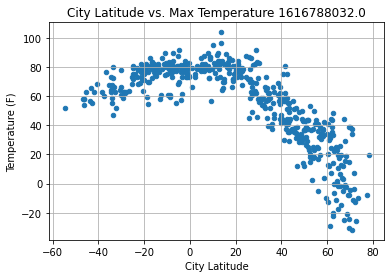

In [20]:
# Generate a scatter plot of city latitude vs. city temperature
date = clean_city_data["Date"][0]
scatter_df = pd.DataFrame({"City Latitude":clean_city_data["Lat"],
                          "Temperature (F)": clean_city_data["Max Temp"]})
scatter_df.plot(kind = "scatter", x = "City Latitude", y = "Temperature (F)",grid = True);
plt.savefig('WeatherPY/output_data/Figure1.png')
plt.title(f"City Latitude vs. Max Temperature {date}");

The graph above is plotting the correlation between city latitude and the city's maximum temperature. As the city gets closer to the equator (Lat 0) the temperature increases and as the city moves away from the equator the temperature decreases.

## Latitude vs. Humidity Plot

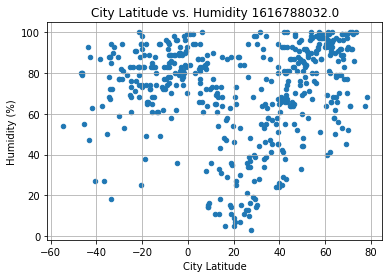

In [22]:
# Generate a scatter plot of city latitude vs. city humidity
date = clean_city_data["Date"][0]
scatter_df = pd.DataFrame({"City Latitude":clean_city_data["Lat"],
                          "Humidity (%)": clean_city_data["Humidity"]})
scatter_df.plot(kind = "scatter", x = "City Latitude", y = "Humidity (%)",grid = True);
plt.savefig('WeatherPY/output_data/Figure2.png')
plt.title(f"City Latitude vs. Humidity {date}");

The above graph is plotting the correlation between latitude and humidity. There does not appear to be a strong linear correlation between a city's geographical position and humidity because the scatter of the points does not form a line. However, there may be a negative parabolic relationship because the dots make a u shape.

## Latitude vs. Cloudiness Plot

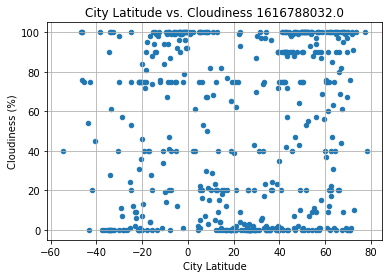

In [23]:
# Generate a scatter plot of city latitude vs. city cloudiness
date = clean_city_data["Date"][0]
scatter_df = pd.DataFrame({"City Latitude":clean_city_data["Lat"],
                          "Cloudiness (%)": clean_city_data["Cloudiness"]})
scatter_df.plot(kind = "scatter", x = "City Latitude", y = "Cloudiness (%)",grid = True);
plt.savefig('WeatherPY/output_data/Figure3.png')
plt.title(f"City Latitude vs. Cloudiness {date}");

The above graph plots the relationship between latitude and cloudiness. There is not a relationship between the two variables because the best fit line would have a slope of 0.

## Latitude vs. Wind Speed Plot

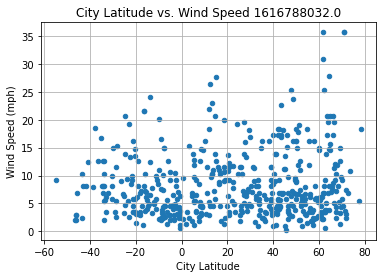

In [24]:
# Generate a scatter plot of city latitude vs. city wind speed
date = clean_city_data["Date"][0]
scatter_df = pd.DataFrame({"City Latitude":clean_city_data["Lat"],
                          "Wind Speed (mph)": clean_city_data["Wind Speed"]})
scatter_df.plot(kind = "scatter", x = "City Latitude", y = "Wind Speed (mph)",grid = True);
plt.savefig('WeatherPY/output_data/Figure4.png')
plt.title(f"City Latitude vs. Wind Speed {date}");

The above graph plots the relationship between city latitude and wind speed. There could be a slight positive relationship between the two variables (as city latitude increases wind speed also increases) but the r value will not be large.

## Linear Regression

In [25]:
#create df for northern and southern hemispheres
northern_hemisphere_df = clean_city_data.loc[clean_city_data["Lat"]>0]
southern_hemisphere_df = clean_city_data.loc[clean_city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.88


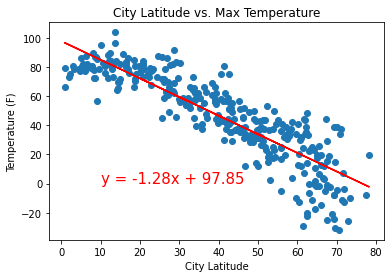

In [26]:
correlation = st.pearsonr(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"])
print(f"The r-value is {round(correlation[0],2)}")
x_values = northern_hemisphere_df["Lat"]
y_values =  northern_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature");
plt.savefig('WeatherPY/output_data/Figure5.png')
plt.show()

The above graph plots the relationship between a city's latitude in the northern hemisphere and the temperature. As the city gets further from the equator (latitude 0) the max temperature decreases. The r-value of -0.88 is a strong negative correlation between the two variables. This means that a city's latitude in the northern hemisphere has a strong correlation with the city's temperature and latitude could be used to predict max temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.58


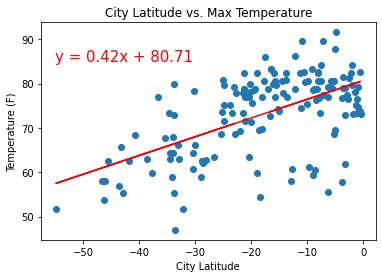

In [37]:
correlation = st.pearsonr(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"])
print(f"The r-value is {round(correlation[0],2)}")
x_values = southern_hemisphere_df["Lat"]
y_values =  southern_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature");
plt.savefig('WeatherPY/output_data/Figure6.png')
plt.show()

The above graph plots the relationship between a city's latitude in the southern hemisphere and the temperature. As the city gets closer to the equator (latitude 0) the max temperature increases. The r-value of 0.58 is a moderately strong positive correlation between the two variables meaning the city's latitude could be used to predict the city's max temperature, but it might not be completely accurate.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.39


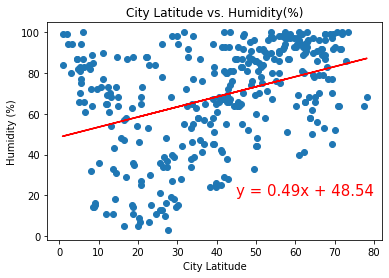

In [28]:
correlation = st.pearsonr(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"])
print(f"The r-value is {round(correlation[0],2)}")
x_values = northern_hemisphere_df["Lat"]
y_values =  northern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity(%)");
plt.savefig('WeatherPY/output_data/Figure7.png')
plt.show()

The above graph plots the relationship between a city's latitude in the northern hemisphere and the humidity. As the city gets further from the equator (latitude 0) the humidity increases. The r-value of 0.39 is a moderately strong positive correlation between the two variables meaning that a city's latitude might be able to predict the humidity level but mostly likely won't be very accurate.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.29


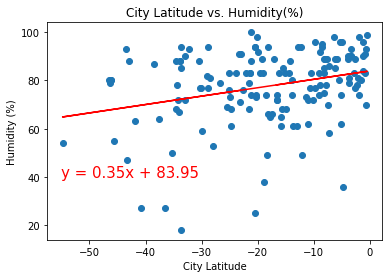

In [36]:
correlation = st.pearsonr(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"])
print(f"The r-value is {round(correlation[0],2)}")
x_values = southern_hemisphere_df["Lat"]
y_values =  southern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity(%)");
plt.savefig('WeatherPY/output_data/Figure8.png')
plt.show()

The above graph plots the relationship between a city's latitude in the southern hemisphere and the humidity. As the city gets closer to the equator (latitude 0) the humidity increases. The r-value of 0.29 is a weak positive correlation between the two variables. This means that latitude in the southern hemisphere is not a strong indicator of the city's humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.26


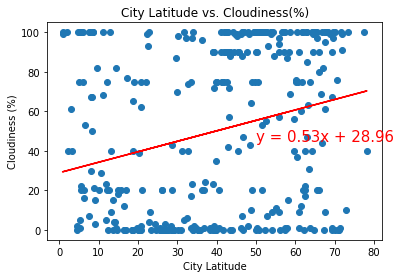

In [31]:
correlation = st.pearsonr(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"])
print(f"The r-value is {round(correlation[0],2)}")
x_values = northern_hemisphere_df["Lat"]
y_values =  northern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,45),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness(%)");
plt.savefig('WeatherPY/output_data/Figure9.png')
plt.show()

The above graph plots the relationship between a city's latitude in the northern hemisphere and the cloudiness level. As the city gets further from the equator (latitude 0) the cloudiness increases. The r-value of 0.26 is a weak positive correlation between the two variables. This means that latitude is not a strong indicator of the city's cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.36


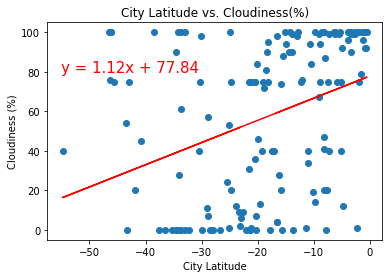

In [32]:
correlation = st.pearsonr(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"])
print(f"The r-value is {round(correlation[0],2)}")
x_values = southern_hemisphere_df["Lat"]
y_values =  southern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness(%)");
plt.savefig('WeatherPY/output_data/Figure10.png')
plt.show()

The above graph plots the relationship between a city's latitude in the southern hemisphere and the cloudiness level. As the city gets closer to the equator (latitude 0) the cloudiness increases. The r-value of 0.36 is a weak positive correlation between the two variables. This means that latitude is not a strong indicator of the city's cloudiness. There is a stronger correlation between a city's latitude and cloudiness in the southern hemisphere than the northern hemisphere because the r-value is 0.1 greater than the northern hemisphere's r-value. However, 0.36 is still not a strong correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.07


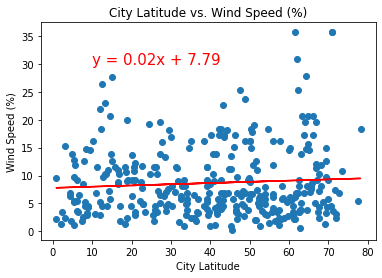

In [35]:
correlation = st.pearsonr(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"])
print(f"The r-value is {round(correlation[0],2)}")
x_values = northern_hemisphere_df["Lat"]
y_values =  northern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (%)')
plt.title(f"City Latitude vs. Wind Speed (%)");
plt.savefig('WeatherPY/output_data/Figure11.png')
plt.show()

The above graph plots the relationship between a city's latitude in the northern hemisphere and the wind speed.The r-value of 0.07 is an extremely weak positive correlation (relationship could be by chance) between the two variables. This means that latitude is not a strong indicator of the city's wind speed and should not be used to predict wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.18


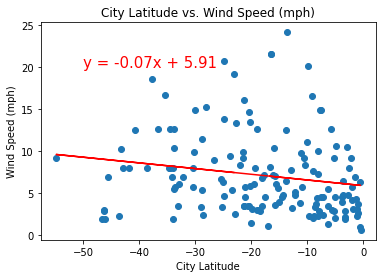

In [38]:
correlation = st.pearsonr(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"])
print(f"The r-value is {round(correlation[0],2)}")
x_values = southern_hemisphere_df["Lat"]
y_values =  southern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed (mph)");
plt.savefig('WeatherPY/output_data/Figure12.png')
plt.show()

The above graph plots the relationship between a city's latitude in the southern hemisphere and the wind speed.The r-value of -0.18 is a weak negative correlation between the two variables. This means that latitude is not a strong indicator of the city's wind speed and most likely should not be used to predict wind speed.